# Simulating Synthetic Temporal Networks (STNs)
In this notebook, the use of the functions in stn_simulations.py is shown
First we must import dependencies, then we set our simulation parameters, then we simulate and plot.

In [1]:
import sys
print(sys.executable)
print(sys.version)

/Users/matteopostiferi/Desktop/Complex Systems/.venv/bin/python
3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

from stn_simulations import *

Set the simulation parameters

In [3]:
B = 3
K = 5
n = 10000
T = 10000
T_start = 1000

Simulate

In [4]:
mean_delay_propagation, mean_delays = synthetic_temporal_network(B, K, n, T, T_start)

Plot mean delay over time

Text(0.5, 1.0, 'Mean delay per node over time')

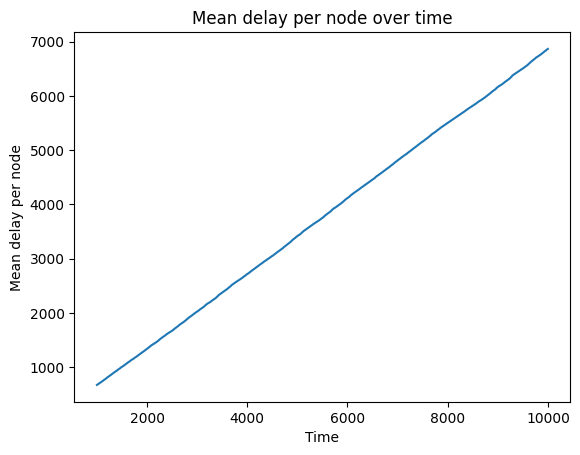

In [5]:
plt.plot(np.arange(T_start, T), mean_delays)
plt.ylabel('Mean delay per node')
plt.xlabel('Time')
plt.title("Mean delay per node over time")

A simple $v$ versus $B$ graph can be made: (We use smaller T to make it quicker)

In [6]:
buffers= np.arange(0,9,0.05)
T = 1000
T_start = 100

# Parallelize the simulation to make it faster
results = Parallel(n_jobs=10)(delayed(synthetic_temporal_network)(buffers[i], K, n, T, T_start) for i in range(len(buffers)))

Text(0.5, 1.0, 'Simple $v$ versus $B$ graph')

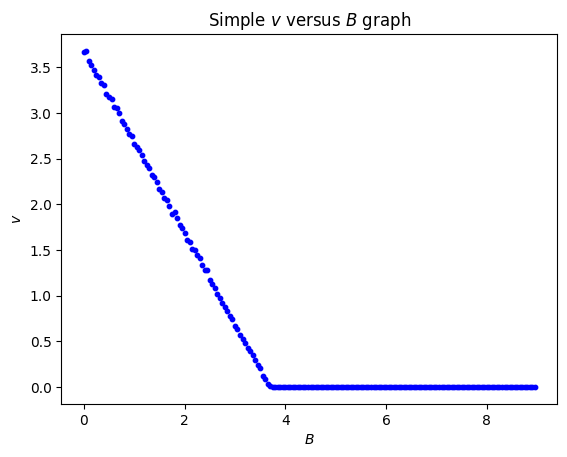

In [7]:
for i in range(len(buffers)):
    plt.scatter(buffers[i], np.mean(results[i][0]), color='blue', s=10)
plt.ylabel(r'$v$')
plt.xlabel(r'$B$')
plt.title(r"Simple $v$ versus $B$ graph")

Building a heterogeneous network is now rather straightforward:

In [8]:
heterogeneity_range = 3
results_het = Parallel(n_jobs=10)(delayed(synthetic_temporal_network_heterogeneous_K)(buffers[i], K, n, T, T_start, heterogeneity_range) for i in range(len(buffers)))

Text(0.5, 1.0, 'Simple $v$ versus $B$ graph, including heterogeneous $K$ STNs')

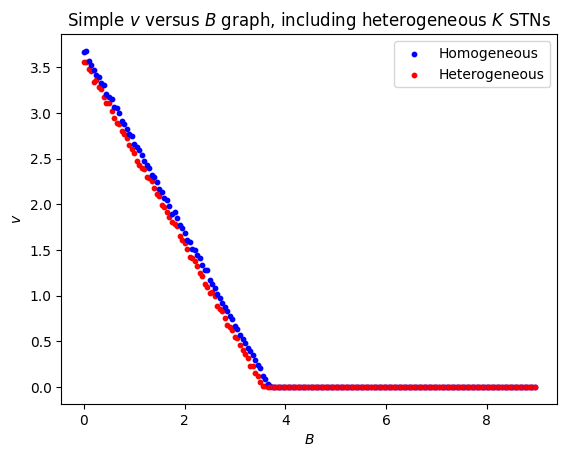

In [9]:
for i in range(len(buffers)):
    plt.scatter(buffers[i], np.mean(results[i][0]), color='blue', s=10, label=r'Homogeneous $K$')
    plt.scatter(buffers[i], np.mean(results_het[i][0]), color='red', s=10, label=r'Heterogeneous $K$')
plt.ylabel(r'$v$')
plt.xlabel(r'$B$')
plt.legend(['Homogeneous', 'Heterogeneous'])
plt.title(r"Simple $v$ versus $B$ graph, including heterogeneous $K$ STNs")

Finally we can do the same for sparse STNs.

In [10]:
sparsities = [0.9, 0.5, 0.1, 0]

sparse_results = []
for sparsity in sparsities:
    sparse_results.append(Parallel(n_jobs=10)(delayed(synthetic_temporal_network_sparsity)(buffers[i], K, n, T, T_start, sparsity) for i in range(len(buffers))))

Text(0.5, 1.0, 'Simple $v$ versus $B$ graph, with sparse STNs')

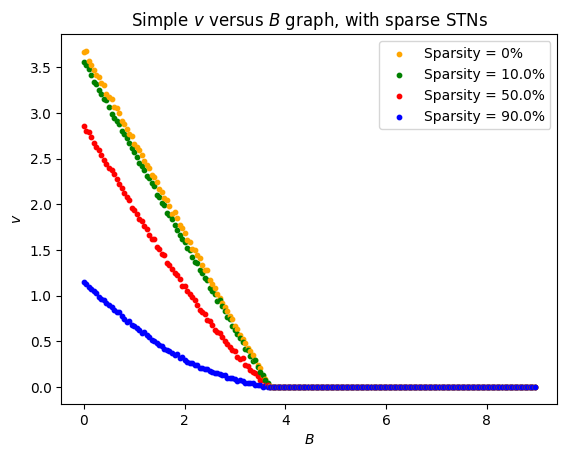

In [11]:
colors = ['blue', 'red', 'green', 'orange']
sparsities = [0.9, 0.5, 0.1, 0]
for i in range(len(buffers)):
    plt.scatter(buffers[i], np.mean(results[i][0]), color=colors[3], s=10, label=f'Sparsity = {100*sparsities[3]}%')
    plt.scatter(buffers[i], np.mean(sparse_results[2][i][0]), color=colors[2], s=10, label=f'Sparsity = {100*sparsities[2]}%')
    plt.scatter(buffers[i], np.mean(sparse_results[1][i][0]), color=colors[1], s=10, label=f'Sparsity = {100*sparsities[1]}%')
    plt.scatter(buffers[i], np.mean(sparse_results[0][i][0]), color=colors[0], s=10, label=f'Sparsity = {100*sparsities[0]}%')


plt.ylabel(r'$v$')
plt.xlabel(r'$B$')
plt.legend([f'Sparsity = {100*sparsities[3]}%',f'Sparsity = {100*sparsities[2]}%',f'Sparsity = {100*sparsities[1]}%',f'Sparsity = {100*sparsities[0]}%', ])
plt.title(r"Simple $v$ versus $B$ graph, with sparse STNs")